## Data Access

The data file is encrypted and hence ought to be decrypted to access the content. This means, one will need a decryption key which can be supplied to the `read_encrypted()` function. Though, you can paste the key into the code (as in Case 1), avoid this and enter the key via the `getpass()` function (as in Case 2). Note that, when entring the key via `getpass()`, the content of what you are typing will be masked or not seen at all. The simplest way is to copy and paste the key when prompted and then hit the enter key.

> When you have been able to access the data, please do not save it to file. Also, remember not to share the data or the key with anyone.

In [1]:
import utils.read_encrypted as ure
import utils.clean_bece as ucl
import getpass
import seaborn as sns

### Case 1

In [ ]:
# df = ure.read_encrypted("data/bece-encrypted.zip", b'paste-key-here')

### Case 2

In [2]:
dt = ure.read_encrypted(
    "data/bece-encrypted.zip", 
    bytes(getpass.getpass("Enter key: "), "utf-8")
)

In [4]:
df = ucl.clean_bece(dt)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519537 entries, 0 to 519536
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   index_no                   519537 non-null  int64   
 1   gender                     519537 non-null  category
 2   jhs_code                   519537 non-null  int64   
 3   jhs_district               519415 non-null  object  
 4   jhs_region                 519417 non-null  object  
 5   jhs_type                   519415 non-null  category
 6   shs_code                   459967 non-null  float64 
 7   shs_name                   459967 non-null  object  
 8   options                    459967 non-null  object  
 9   english                    519477 non-null  float64 
 10  maths                      519477 non-null  float64 
 11  socstudies                 519477 non-null  float64 
 12  rme                        519477 non-null  float64 
 13  intscience    

In [ ]:
df.isnull().sum()

In [6]:
df[["english", "maths", "intscience"]].dropna().corr()

,english,maths,intscience
english,1.000000,0.682681,0.787897
maths,0.682681,1.000000,0.770653
intscience,0.787897,0.770653,1.000000


In [47]:
df.options.value_counts()

C    220783
B    163765
A     47076
E     28343
Name: options, dtype: int64

In [50]:
df[["english", "maths", "intscience", "raw_score"]].dropna().describe()

,english,maths,intscience,raw_score
count,519477.000000,519477.000000,519477.000000,519477.000000
mean,39.286783,53.506515,41.796378,310.877627
std,14.986149,19.790591,16.487609,91.851255
min,0.000000,0.000000,0.000000,0.000000
25%,29.000000,39.000000,30.000000,252.000000
50%,39.000000,53.000000,41.000000,314.000000
75%,50.000000,68.000000,53.000000,375.000000
max,91.000000,100.000000,96.000000,570.000000


In [58]:
df[df.raw_score == 0].jhs_region.value_counts()

Ashanti          1190
Western           795
Northern          696
Greater Accra     627
Brong-Ahafo       564
Eastern           562
Central           458
Volta             278
Upper East        271
Upper West        141
Unknown            22
Name: jhs_region, dtype: int64

In [56]:
df[df.jhs_code == 7006].shape

(508, 26)

In [69]:
df[df.shs_name.isna()][["aggregate", "raw_score"]]

,aggregate,raw_score
126731,22.0,379.0
183426,26.0,342.0
252834,31.0,301.0
351028,8.0,488.0
351037,9.0,499.0
...,...,...
519519,26.0,349.0
519520,0.0,0.0
519521,23.0,363.0
519524,0.0,0.0


In [90]:
df[["raw_score", "options"]].dropna().groupby(["options"]).describe()

raw_score                                                         
            count        mean        std   min    25%    50%    75%    max
options                                                                   
A         47054.0  428.931355  60.153954  83.0  395.0  436.0  472.0  570.0
B        163739.0  351.116362  63.200203  41.0  312.0  353.0  394.0  570.0
C        220777.0  293.774655  65.624585   0.0  247.0  291.0  339.0  529.0
E         28343.0  297.534135  70.430555  93.0  245.0  295.0  350.0  512.0

In [18]:
df.isnull().sum().max()

59570

In [20]:
df.describe()

,index_no,jhs_code,shs_code,english,maths,socstudies,rme,intscience,ict,french,best_elective_1_score,best_elective_1_aggregate,best_elective_2_score,best_elective_2_aggregate,count_of_ones,aggregate,raw_score
count,519537.000000,519537.000000,4.599670e+05,519477.000000,519477.000000,519477.000000,519477.000000,519477.000000,519477.000000,519477.000000,518205.000000,518205.000000,518205.000000,518205.000000,519483.000000,519483.000000,519483.000000
mean,259769.000000,8380.800155,6.029964e+05,39.286783,53.506515,49.621119,54.021562,41.796378,58.182170,24.682864,55.842682,4.805816,52.308125,5.021362,0.295634,28.585551,310.878221
std,149977.557739,4870.390890,2.164927e+06,14.986149,19.790591,16.409984,18.304974,16.487609,21.019187,32.735378,20.952460,2.222126,16.587610,2.023523,0.998504,10.590144,91.851637
min,1.000000,1.000000,1.010100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129885.000000,4144.000000,3.040300e+04,29.000000,39.000000,39.000000,42.000000,30.000000,46.000000,0.000000,46.000000,3.000000,42.000000,4.000000,0.000000,21.000000,252.000000
50%,259769.000000,8384.000000,5.060200e+04,39.000000,53.000000,51.000000,56.000000,41.000000,61.000000,0.000000,60.000000,5.000000,54.000000,5.000000,0.000000,29.000000,314.000000
75%,389653.000000,12587.000000,7.050400e+04,50.000000,68.000000,61.000000,68.000000,53.000000,74.000000,55.000000,71.000000,6.000000,64.000000,6.000000,0.000000,36.000000,375.000000
max,519537.000000,16893.000000,9.101001e+06,91.000000,100.000000,98.000000,98.000000,96.000000,100.000000,100.000000,96.000000,9.000000,95.000000,9.000000,9.000000,54.000000,570.000000


<AxesSubplot:xlabel='english'>

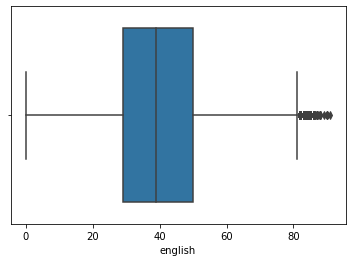

In [11]:
sns.boxplot(x = df["english"])